<a href="https://colab.research.google.com/github/madanmohan-venkatesan/notebooks/blob/main/SAVVI_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install savvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.2

In [1]:
import numpy as np

rho = np.array([0.1, 0.3, 0.6])
delta = np.log([0.2, 0.3, 0.4])
theta = rho * np.exp(delta) / np.sum(rho * np.exp(delta))
size = 4000
np.random.seed(1)
xs = np.random.multinomial(1, theta, size=size)
print(xs)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [2]:
from savvi.multinomial import InhomogeneousBernoulliProcess

alpha = 0.05
hypothesis = lambda delta: [delta[0] >= delta[1], delta[0] >= delta[2]]
weights = np.array([[-1, 0, 1], [0, -1, 1]])
ibp = InhomogeneousBernoulliProcess(alpha, rho, hypothesis, weights)

In [11]:
sequence = ibp.batch(xs)

KeyboardInterrupt: 

In [10]:
optional_stop = next(s for s in sequence if s.p_value <= alpha)
optional_stop

/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


KeyboardInterrupt: 

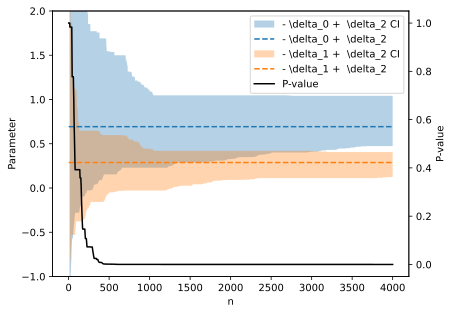

In [4]:
%config InlineBackend.figure_formats = ["svg"]
import matplotlib.pyplot as plt
from savvi.utils import plot

contrasts = ibp.weights @ delta
_, ax1, _ = plot(sequence, contrasts)
ax1.set_ylim(-1, 2)
plt.show()

In [9]:
next(s for s in range(10))

0